In [49]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series

# 控制变量包括上一日的组合换手率 (Tur (-1) ) 、股票组合中机构投资者比例、
# 沪深300成分股比例、流通市值和市值账面价值比等, 市值账面价值比取滞后1个季度的数据得到。
# ret(-1), tur(-1), 
# 'proportion'--Ins hol(机构投资者比例)
# Mar Cap 流通市值 - 流通股市值的自然对数
# MBR(-1)市值账面价值比 - 季度数据
# 'HSrate'--HS Rat 沪深300成分股比例

cities = ['深圳','上海','广州','北京','成都','杭州','重庆','西安','苏州','武汉',
          '南京','天津','郑州','长沙','东莞','佛山','宁波','青岛','沈阳','合肥']
pinyin = ['shenzhen','shanghai','guangzhou','beijing','chengdu','hangzhou','chongqing','xian','suzhou','wuhan',
          'nanjing','tianjin','zhengzhou','changsha','dongguan','foshan','ningbo','qingdao','shenyang','hefei']
myDict = {'date':[],'max':[],'min':[],'weather':[],'wind':[],'lrad':[],'prec':[],'pres':[],
          'shum':[],'srad':[],'tempDiff':[],
          'proportion':[],'HSrate':[],'MarCap':[],'tur(-1)':[],'tur':[]}
date2I = {}

In [50]:
def handleDate(date):
    date=list(map(int,date.split('-')))
    year=str(date[0])
    month=str(date[1]) if date[1]>9 else '0'+str(date[1])
    day=str(date[2]) if date[2]>9 else '0'+str(date[2])
    return year+'-'+month+'-'+day
def handleDate2(date):
    x=date.find('星期')
    y=date.find('周')
    z=max(x,y)
    if z==-1:
        return date
    else:
        return date[:z]

In [1]:
data=DataFrame()
for _ in range(len(cities)):
    city=cities[_]
    city2=pinyin[_]
    sourcePath = '/Users/rumeng/Downloads/qingzang/trainSet/'
    num=0
    myDict = {'date':[],'max':[],'min':[],'weather':[],'wind':[],'lrad':[],'prec':[],'pres':[],
              'shum':[],'srad':[],'tempDiff':[],'proportion':[],
              'HSrate':[],'MarCap':[],'ret(-1)':[],'tur(-1)':[],'tur':[]}
    with open(sourcePath+'climate2/'+city+'.json', 'r',encoding='utf-8-sig') as f:
        lines = f.readlines()
        for line in lines:
            climateInfo = json.loads(line)
            date=handleDate(climateInfo['date'])
            date2I[date]=num
            num+=1
            myDict['date'].append(date)
            myDict['max'].append(float(climateInfo['temp']['maxTemp']))
            myDict['min'].append(float(climateInfo['temp']['minTemp']))
            myDict['weather'].append('')
            myDict['wind'].append(float(climateInfo['wind']))##wind风速
            myDict['lrad'].append(float(climateInfo['lrad']))##lrad地面向下长波辐射
            myDict['prec'].append(float(climateInfo['prec']))##prec降水率
            myDict['pres'].append(float(climateInfo['pres']))##pres近地表气压
            myDict['shum'].append(float(climateInfo['shum']))##shum近地表空气比湿度
            myDict['srad'].append(float(climateInfo['srad']))##srad地面向下短波辐射 
            myDict['tempDiff'].append(float(climateInfo['tempDiff']))##与前一日的温差
            myDict['proportion'].append(-100)##机构投资者比例
            myDict['HSrate'].append(0.09488636363636363)##沪深300成分股比例
            # 交集固定为167，样本为1760，故比例固定
            myDict['MarCap'].append(-100)##流通股市值的自然对数
            myDict['ret(-1)'].append(-100)##动量因子，前一日的收益率
            myDict['tur(-1)'].append(-100)##动量因子，前一日的换手率
            myDict['tur'].append(-100)##换手率
#     print(city,'climateinfo len:',num)
            

    with open(sourcePath+'proportion/city/'+city+'.json', 'r',encoding='utf-8-sig') as f:
        lines = f.readlines()
        lastdate=-1
        lastvalue=-1
        for line in lines:
            proportionInfo = json.loads(line)
            time=handleDate2(proportionInfo['date'])
            i = date2I[time]
            if lastdate!=-1:
                for k in range(lastdate,i):
                    myDict['proportion'][k]=lastvalue
            lastdate=i
            lastvalue=float(proportionInfo['proportion'])
        for k in range(i,len(myDict['proportion'])):
            myDict['proportion'][k]=lastvalue
    
    with open(sourcePath+'weather/'+city2+'.json', 'r',encoding='utf-8-sig') as f:
        lines = f.readlines()
        for line in lines:
            weatherInfo = json.loads(line)
            time=handleDate2(weatherInfo['time'])
            i = date2I[time]
            if time!=myDict['date'][i]:
                console.log('error:', weatherInfo['time'], myDict['date'][i])
                break
            myDict['weather'][i]=weatherInfo['weather']
    
    with open(sourcePath+'explainedVariable/'+city+'.json', 'r',encoding='utf-8-sig') as f:
        lines = f.readlines()
        lastTur=-1
        lastRet=-1
        for line in lines:
            variaInfo = json.loads(line)
            time=handleDate2(variaInfo['Trddt'])
            i = date2I[time]
            if time!=myDict['date'][i]:
                console.log('error:', weatherInfo['time'], myDict['date'][i])
                break
            myDict['MarCap'][i]=float(variaInfo['MarCap'])
            myDict['tur'][i]=float(variaInfo['turnover'])
            if lastTur!=-1:
                myDict['tur(-1)'][i]=lastTur
            if lastRet!=-1:
                myDict['ret(-1)'][i]=lastRet
            lastTur=float(variaInfo['turnover'])
            lastRet=float(variaInfo['portReturn'])
    
#     print(myDict.keys())
    myDf = DataFrame(myDict)
#     print(myDf)
    myDf2 = myDf[myDf!=''].dropna()
    myDf2 = myDf2[myDf2!=-100].dropna()
    data = pd.concat([data,myDf2])
    print(len(myDf2))
print(len(data))

NameError: name 'DataFrame' is not defined

In [76]:
print(data.describe())
print(data.columns)
print(data['ret(-1)'])
print(data['tur(-1)'])
print(data['tur'])

                max           min          wind          lrad          prec  \
count  38713.000000  38713.000000  38713.000000  38713.000000  38713.000000   
mean     295.742364    281.850223      2.368063    355.708001      0.144826   
std        9.885069     11.890224      0.938002     65.793858      0.353068   
min      258.650000    241.129990      0.280000    146.490000      0.000000   
25%      288.440000    273.199980      1.690000    310.370000      0.000000   
50%      297.620000    283.240000      2.170000    364.790000      0.020000   
75%      303.750000    291.919980      2.830000    412.180000      0.110000   
max      317.590000    303.949980     11.570000    473.960000      7.330000   

                pres          shum          srad      tempDiff    proportion  \
count   38713.000000  38713.000000  38713.000000  38713.000000  38713.000000   
mean    98995.118155      0.009897    152.897131     -0.004318     54.751305   
std      3342.104120      0.007132     82.068680

In [56]:
# 将天气转化为雪、雨、沙尘、云量、霾、雾、冰雹、晴天的哑变量
def handleWeather(weather):
    state=[0,0,0,0,0,0,0,0]
    weather=weather.replace('~','')
    if '暴雪' in weather:
        state[0]=4
    elif '大雪' in weather:
        state[0]=3
    elif '中雪' in weather:
        state[0]=2
    elif '雪' in weather:
        state[0]=1
        
    if '暴雨' in weather:
        state[1]=4
    elif '大雨' in weather:
        state[1]=3
    elif '中雨' in weather:
        state[1]=2
    elif '雨' in weather:
        state[1]=1
    
    if '沙尘暴' in weather:
        state[2]=3
    elif '扬沙' in weather:
        state[2]=2
    elif '浮尘' in weather:
        state[2]=1
        
    if '阴' in weather:
        state[3]=3 
    elif '多云' in weather:
        state[3]=2
    elif '少云' in weather:
        state[3]=1
        
    if '霾' in weather:
        state[4]=1
    if '雾' in weather:
        state[5]=1
    if '冰雹' in weather:
        state[6]=1
    if weather=='晴':
        state[7]=1
#     if sum(state)==0 and weather!='晴':
#         print(weather,state)
    return state

In [77]:
data.insert(0,'sun',0)
data.insert(0,'hail',0)
data.insert(0,'fog',0)
data.insert(0,'haze',0)
data.insert(0,'cloud',0)
data.insert(0,'sand',0)
data.insert(0,'rain',0)
data.insert(0,'snow',0)


data['min']=data['min'].map(lambda x:float(x)-273.15)
data['max']=data['max'].map(lambda x:float(x)-273.15)
print(data.columns)
weatherIndex=11
# print(data.iloc[0,weatherIndex])
for i in range(len(data)):
    state=handleWeather(data.iloc[i,weatherIndex])
    data.iloc[i,0]=state[0]
    data.iloc[i,1]=state[1]
    data.iloc[i,2]=state[2]
    data.iloc[i,3]=state[3]
    data.iloc[i,4]=state[4]
    data.iloc[i,5]=state[5]
    data.iloc[i,6]=state[6]
    data.iloc[i,7]=state[7]

Index(['snow', 'rain', 'sand', 'cloud', 'haze', 'fog', 'hail', 'sun', 'date',
       'max', 'min', 'weather', 'wind', 'lrad', 'prec', 'pres', 'shum', 'srad',
       'tempDiff', 'proportion', 'HSrate', 'MarCap', 'ret(-1)', 'tur(-1)',
       'tur'],
      dtype='object')


In [64]:
print(data[['snow','rain','sand','cloud','haze','fog','hail','sun',
            'max','min', 'wind', 'lrad', 'prec', 'pres', 'shum', 'srad',
            'tempDiff', 'proportion', 'MarCap', 'tur(-1)', 'tur']].corr())

                snow      rain      sand     cloud      haze       fog  \
snow        1.000000 -0.002677 -0.001987 -0.044729 -0.002198  0.008382   
rain       -0.002677  1.000000 -0.010075 -0.345742 -0.055193 -0.024180   
sand       -0.001987 -0.010075  1.000000 -0.015974  0.005259 -0.001242   
cloud      -0.044729 -0.345742 -0.015974  1.000000 -0.071031 -0.031427   
haze       -0.002198 -0.055193  0.005259 -0.071031  1.000000  0.054287   
fog         0.008382 -0.024180 -0.001242 -0.031427  0.054287  1.000000   
hail       -0.000526  0.022900 -0.000098 -0.005799 -0.000509 -0.000328   
sun        -0.049501 -0.273449 -0.009200 -0.546177 -0.047913 -0.030934   
max        -0.200671  0.116480 -0.000316 -0.004422 -0.100897 -0.045271   
min        -0.141250  0.220515 -0.006182 -0.028896 -0.117258 -0.040659   
wind        0.045800  0.061906  0.044563 -0.051683 -0.032031  0.000600   
lrad       -0.122658  0.338506 -0.016011  0.023717 -0.099793 -0.035972   
prec       -0.005894  0.596488 -0.0073

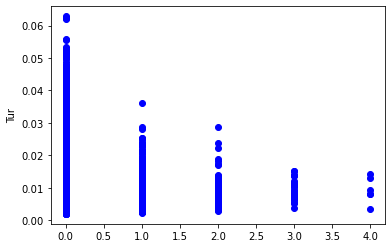

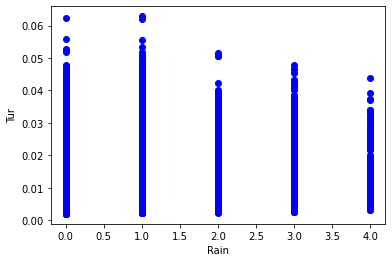

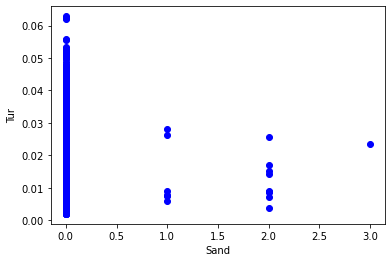

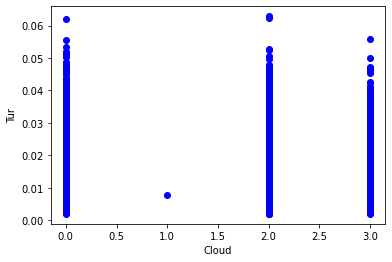

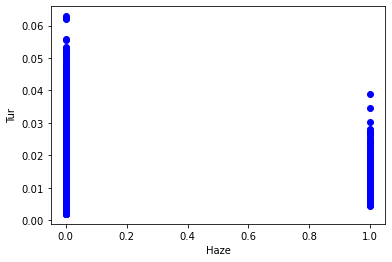

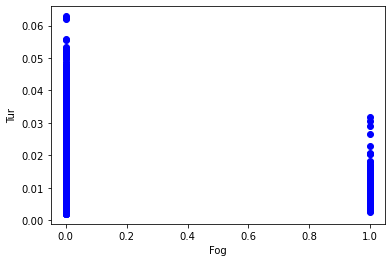

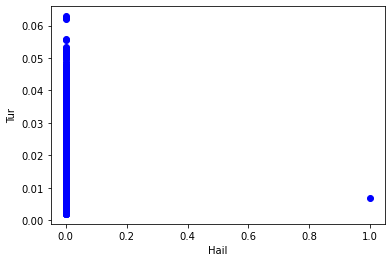

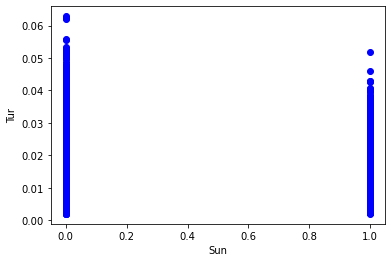

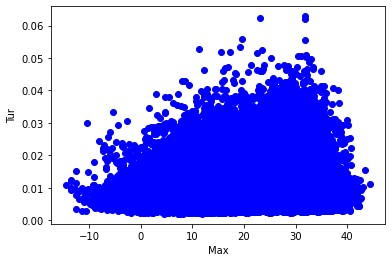

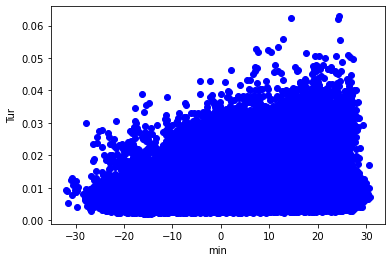

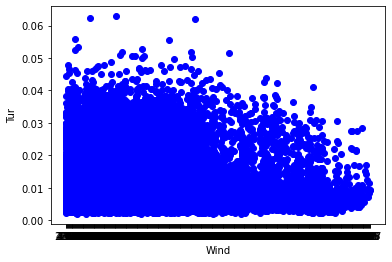

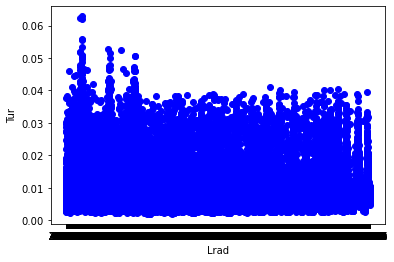

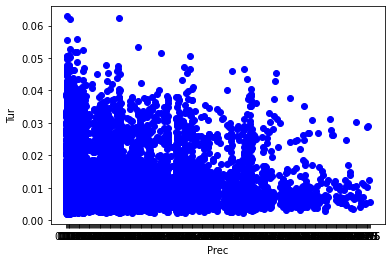

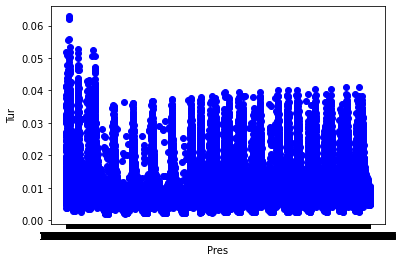

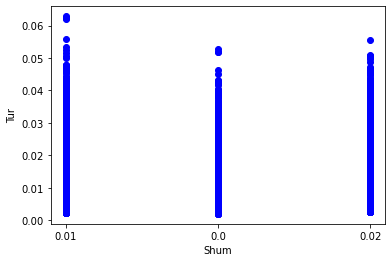

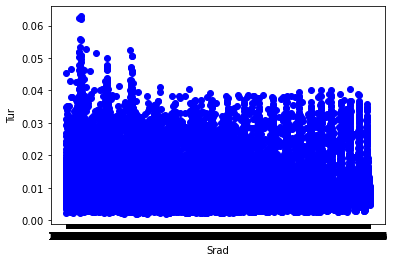

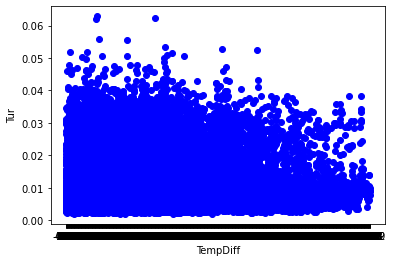

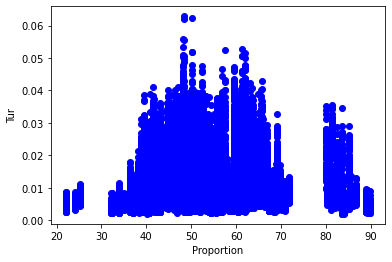

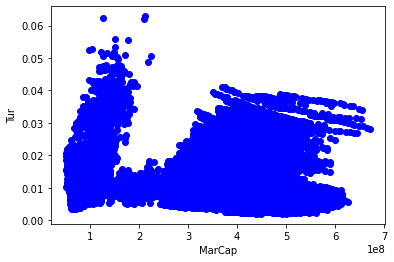

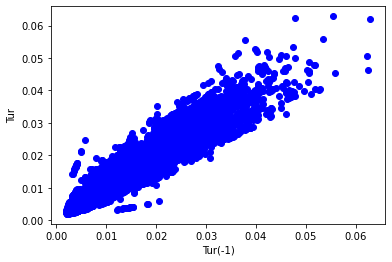

In [38]:
# Snow
plt.scatter(data.snow, data.tur,color = 'b',label = "Exam Data")
plt.ylabel("Tur")
plt.show()
# Rain
plt.scatter(data.rain,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Rain")
plt.ylabel("Tur")
plt.show()
# Sand
plt.scatter(data.sand,data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Sand')
plt.ylabel("Tur")
plt.show()
# Cloud
plt.scatter(data.cloud,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Cloud")
plt.ylabel("Tur")
plt.show()
# Haze
plt.scatter(data.haze,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Haze")
plt.ylabel("Tur")
plt.show()
# Fog
plt.scatter(data.fog,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Fog")
plt.ylabel("Tur")
plt.show()
# Hail
plt.scatter(data.hail,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Hail")
plt.ylabel("Tur")
plt.show()
# Sun
plt.scatter(data.sun,data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Sun")
plt.ylabel("Tur")
plt.show()
# Max
plt.scatter(data['max'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel("Max")
plt.ylabel("Tur")
plt.show()
# Min
plt.scatter(data['min'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('min')
plt.ylabel("Tur")
plt.show()
# Wind
plt.scatter(data['wind'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Wind')
plt.ylabel("Tur")
plt.show()
# Lrad
plt.scatter(data['lrad'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Lrad')
plt.ylabel("Tur")
plt.show()
# Prec
plt.scatter(data['prec'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Prec')
plt.ylabel("Tur")
plt.show()
# Pres
plt.scatter(data['pres'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Pres')
plt.ylabel("Tur")
plt.show()
# Shum
plt.scatter(data['shum'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Shum')
plt.ylabel("Tur")
plt.show()
# Srad
plt.scatter(data['srad'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Srad')
plt.ylabel("Tur")
plt.show()
# TempDiff
plt.scatter(data['tempDiff'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('TempDiff')
plt.ylabel("Tur")
plt.show()
# Proportion
plt.scatter(data['proportion'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Proportion')
plt.ylabel("Tur")
plt.show()
# MarCap
plt.scatter(data['MarCap'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('MarCap')
plt.ylabel("Tur")
plt.show()
# Tur(-1)
plt.scatter(data['tur(-1)'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Tur(-1)')
plt.ylabel("Tur")
plt.show()
##'prec', 'pres', 'shum', 'srad','tempDiff', 'proportion', 'MarCap', 'tur(-1)', 

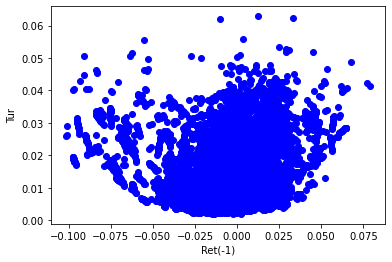

In [79]:
plt.scatter(data['ret(-1)'],data.tur,color = 'b',label = "Exam Data")
plt.xlabel('Ret(-1)')
plt.ylabel("Tur")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

In [84]:
exam_df=data[['snow', 'rain', 'sand', 'cloud', 'haze', 'fog', 'hail', 'sun',
              'max', 'min', 'wind', 'lrad', 'prec', 'pres', 'shum', 'srad','tempDiff', 
              'proportion', 'HSrate', 'MarCap', 'ret(-1)','tur(-1)', 'tur']]
exam_df['MarCap']=exam_df['MarCap'].apply(lambda x : math.log(x))
exam_df=exam_df.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
print(exam_df.describe())
# exam_X=exam_df[['snow', 'rain', 'sand', 'cloud', 'haze', 'fog', 'hail', 'sun',
#                 'max', 'min', 'wind', 'lrad', 'prec', 'pres', 'shum', 'srad','tempDiff', 
#                 'proportion', 'MarCap', 'tur(-1)']]
exam_X=exam_df[['snow', 'rain', 'cloud',
                'max', 'min', 'wind',  'prec', 'pres', 'tempDiff', 
                'proportion', 'MarCap', 'ret(-1)', 'tur(-1)']]
exam_Y=exam_df['tur']
exam_Y=exam_df['tur']
#将原数据集拆分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(exam_X,exam_Y,train_size=.8)
#X_train为训练数据标签,X_test为测试数据标签,exam_X为样本特征,exam_y为样本标签，train_size 训练数据占比
print("原始数据特征:",exam_X.shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
print("原始数据标签:",exam_Y.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

               snow          rain          sand         cloud          haze  \
count  38713.000000  38713.000000  38713.000000  38713.000000  38713.000000   
mean       0.004133      0.112520      0.000232      0.454645      0.009919   
std        0.039968      0.196975      0.012097      0.398470      0.099101   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.666667      0.000000   
75%        0.000000      0.250000      0.000000      0.666667      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                fog          hail           sun           max           min  \
count  38713.000000  38713.000000  38713.000000  38713.000000  38713.000000   
mean       0.004159      0.000026      0.186423      0.629324      0.648205   
std        0.064355      0.005082      0.389453    

/var/folders/97/t5p37xd91tbg2h4b_0h0x6t00000gn/T/ipykernel_1696/2634586774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_df['MarCap']=exam_df['MarCap'].apply(lambda x : math.log(x))


In [87]:
##线性回归
model = LinearRegression()
model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)
flag=0
for i in X_train.columns:
    print(i,':',"%e"%b[flag])
    flag+=1

#训练数据的预测值
y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)
score1 = model.score(X_test,Y_test)
# score2 = r2_score(Y_test, y_test_pred)
print('r2 score:',score1)
# print('r2 score:',score2)

最佳拟合线:截距 -0.028337569309473343 ,回归系数： [-1.53692698e-05  5.27031123e-03  4.80630751e-04  4.29769957e-05
 -2.07711992e-03  4.31726182e-03 -6.99460847e-04  3.45197759e-04
  4.77045942e-03  4.17181777e-06 -6.07789427e-03  6.92079820e-02
  9.45845214e-01]
snow : -1.536927e-05
rain : 5.270311e-03
cloud : 4.806308e-04
max : 4.297700e-05
min : -2.077120e-03
wind : 4.317262e-03
prec : -6.994608e-04
pres : 3.451978e-04
tempDiff : 4.770459e-03
proportion : 4.171818e-06
MarCap : -6.077894e-03
ret(-1) : 6.920798e-02
tur(-1) : 9.458452e-01
r2 score: 0.9089581687010688
